In [1]:
# 本数据报告以淘宝app平台为数据集，通过行业的指标对淘宝用户行为进行分析，从而探索淘宝用户的行为模式

# 提出问题
# 1.日PV有多少
# 2.日UV有多少
# 3.付费率情况如何
# 4.复购率是多少
# 5 漏斗流失情况如何
# 6.用户价值情况

# 本数据集共有104万条左右数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共计6列字段，列字段分别是：
# user_id：用户身份，脱敏
# item_id：商品ID，脱敏
# behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
# user_geohash：地理位置
# item_category：品类ID（商品所属的品类）
# time：用户行为发生的时间

In [2]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#讀取數據
df=pd.read_csv('tianchi_mobile_recommend_train_user.csv')

In [6]:
#處理缺失值
missingTotal=df.isnull().sum()
missingExist=missingTotal[missingTotal>0]
#有缺失的數量和,按降序排列
missingExist=missingExist.sort_values(ascending=False)

In [7]:
missingExist

user_geohash    8334824
dtype: int64

In [9]:
missingTotal
#存在缺失值的是User_geohash，有717785条，不能删除缺失值，因为地理信息在数据集收集过程中做过加密转换，因此对数据集不做处理

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [10]:
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [11]:
import re

In [15]:
#一致化处理
#拆分數據集
df['date']=df['time'].map(lambda s:re.compile(' ').split(s)[0])

In [16]:
df['hour']=df['time'].map(lambda s:re.compile(' ').split(s)[1])
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [17]:
#查看数据集数据类型
df.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [19]:
#发现time列和date列应该转化为日期类数据类型，hour列应该是字符串数据类型。

#数据类型转化
df['date']=pd.to_datetime(df['date'])
df['time']=pd.to_datetime(df['time'])
df['hour']=df['hour'].astype('int64')
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [20]:
#异常值处理
#time升序排列
df=df.sort_values(by='time',ascending=True)
#reset_index可以还原索引，重新变为默认的整型索引，drop为False则索引列会被还原为普通列，否则会丢失
df=df.reset_index(drop=True)
df.describe()
#通过观察数据集的四分位数，总数，平均值，方差等，发现数据集并无异常值存在

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


In [21]:
# pv和uv分析
# PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。
# UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客

Text(0.5, 1.0, 'pv_daily')

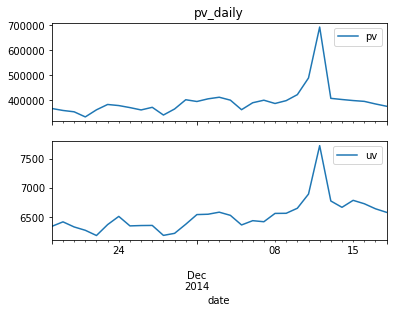

In [24]:
# 日访问量分析
# pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
pv_daily=df.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=df.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv_daily')

#结果所示，在双十二期间，pv和uv访问量达到峰值，并且可以发现，uv和pv两个访问量数值差距比较大，
# 同时，因为数据集总人数大约是10000人左右，因此，通过nv值可以分析出双十二期间淘宝用户的日活跃大概是45%浮动

Text(0.5, 1.0, 'uv_hour')

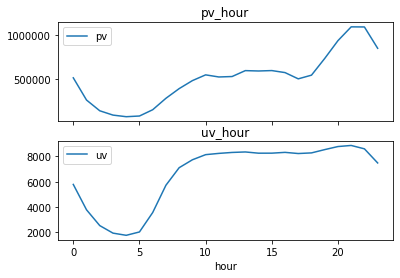

In [27]:
#小时访问量分析
#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=df.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=df.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

#图表显示:pv和uv在凌晨0-5点期间波动情况相同，都呈下降趋势，访问量都比较小，同时在晚上18：00左右，pv波动情况比较剧烈，相比来看uv不太明显，
# 因此晚上18：00以后是淘宝用户访问app的活跃时间段

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

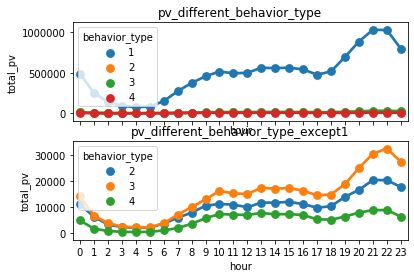

In [28]:
#不同行为类型用户pv分析
pv_detail=df.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!=1],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

#有图表显示：点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的。从图2可以看出，加入购物车这一用户行为的pv总量高于收藏的总量，
#因此在后续漏斗流失分析中，用户类型3应该在2之前分析

Text(0.5, 1.0, 'daily_user_buy')

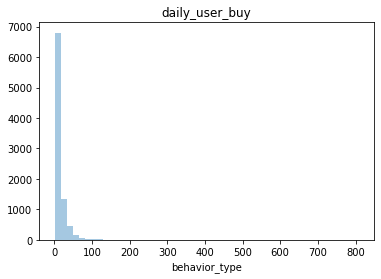

In [30]:
# 用户消费行为分析

#用户购买次数情况分析
df_buy=df[df.behavior_type==4].groupby('user_id')['behavior_type'].count()
#kde,控制是否显示核密度估计图
sns.distplot(df_buy,kde=False)
plt.title('daily_user_buy')

#图表显示：淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体

Text(0.5, 1.0, 'daily_ARPPU')

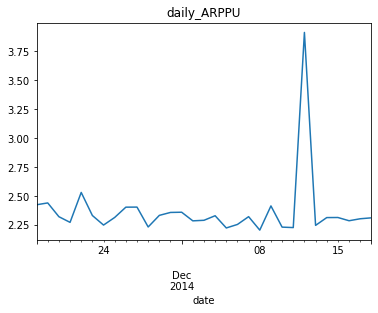

In [37]:
#日ARPPU
# ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。
# ARPPU=总收入/活跃用户付费数量
# 因为本数据集中没有消费金额，因此在计算过程中用消费次数代替消费金额
# 人均消费次数=消费总次数/消费人数
df_buy1=df[df.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
df_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')

#图表显示：平均每天消费次数在1-2次之间波动，双十二期间消费次数达到最高值

Text(0.5, 1.0, 'daily_ARPU')

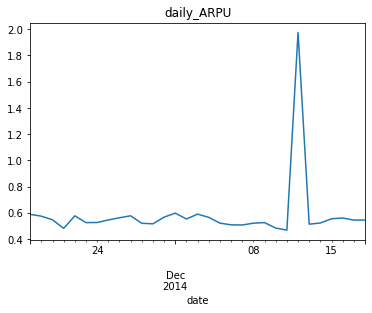

In [45]:
# 日ARPU
#ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。
#活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)
df['operation']=1
df_buy2=df.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
df_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot()
plt.title('daily_ARPU')

Text(0.5, 1.0, 'daily_afford_rate')

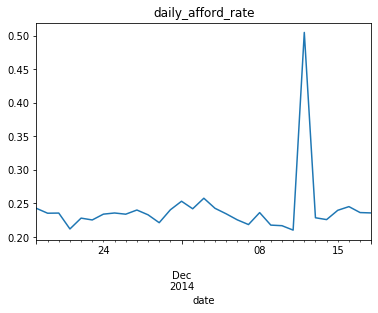

In [47]:
# 付费率
#付费率=消费人数/活跃用户人数
df_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')

大多數用戶消費: 1次


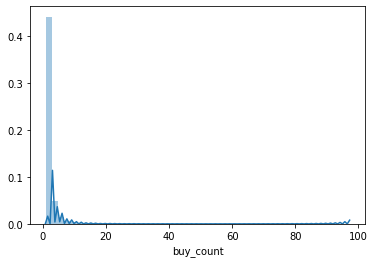

In [49]:
#同一时间段用户消费次数分布
df_buy3=df[df.behavior_type==4].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(df_buy3)
print('大多數用戶消費: {}次'.format(df_buy3.mode()[0]))

In [52]:
#复购情况，即两天以上有购买行为,一天多次购买算一次
#复购率=有复购行为的用户数/有购买行为的用户总数
df_rebuy=df[df.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print("復購率",round(df_rebuy[df_rebuy>=2].count()/df_rebuy.count(),4))

復購率 0.8717


Text(0, 0.5, 'gap_count')

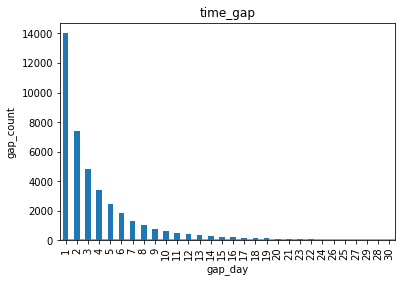

In [65]:
#所有复购时间间隔消费次数分布
df_day_buy=df[df.behavior_type==4].groupby(['user_id','date']).operation.count().reset_index()
df_buy4=df_day_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
df_buy4=df_buy4.map(lambda x:x.days)
df_buy4.value_counts().plot(kind='bar')
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')

# 多数用户复购率为0.4693，消费次数随着消费时间间隔的增加而不断下降，在1-10天之内复购次数比较多，10天之后复购次数淘宝用户很少在进行复购，
# 因此需要重视10天之内的淘宝用户复购行为，增加用户复购。

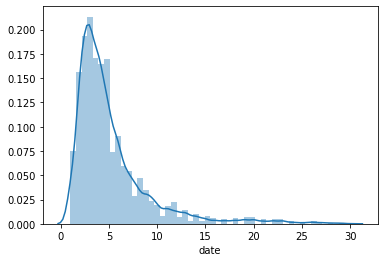

In [67]:
#不同用户平均复购时间分析
sns.distplot(df_buy4.reset_index().groupby('user_id').date.mean())

#不同用户平均复购时间呈正态分布，但是总体来看，呈现逐渐下降趋势。多数淘宝用户平均复购时间集中在1-5天时间间隔内

In [74]:
# 漏斗流失分析
# 从起点到终点各阶段用户转化率情况的重要分析模型
df_count=df.groupby(['behavior_type']).count()
print(df_count.head())
pv_all=df['user_id'].count()
pv_all

                user_id   item_id  user_geohash  item_category      time  \
behavior_type                                                              
1              11550581  11550581       3704666       11550581  11550581   
2                242556    242556         74365         242556    242556   
3                343564    343564        104443         343564    343564   
4                120205    120205         38608         120205    120205   

                   date      hour  operation  
behavior_type                                 
1              11550581  11550581   11550581  
2                242556    242556     242556  
3                343564    343564     343564  
4                120205    120205     120205  


12256906

In [69]:
# 用户行为与商品种类关系分析
#不同用户行为类别的转化率
df_category=df[df.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)
df_category.head()

behavior_type,点击量,加入购物车量,购买量
item_category,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0


In [70]:
#转化率计算
df_category['转化率']=df_category['购买量']/df_category['点击量']
df_category.head()

behavior_type,点击量,加入购物车量,购买量,转化率
item_category,,,,
2,3.0,0.0,0.0,0.000000
3,3.0,0.0,0.0,0.000000
4,1.0,0.0,0.0,0.000000
6,10.0,0.0,0.0,0.000000
8,976.0,4.0,4.0,0.004098


D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from current fon

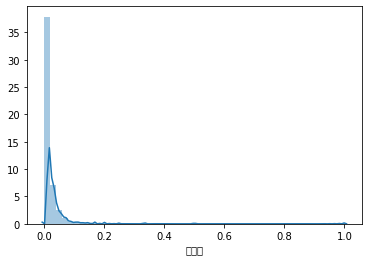

In [72]:
#异常值处理
df_category=df_category.fillna(0)
df_category=df_category[df_category['转化率']<=1]
#转化率绘图
sns.distplot(df_category['转化率'])

D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from current fon

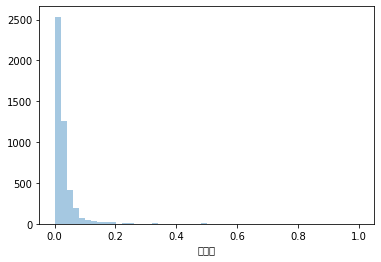

In [73]:
sns.distplot(df_category[df_category['转化率']>0]['转化率'],kde=False)

#图表显示：基本上各种用户行为类型转换率都在0.1以内,同时绝大多数用户都没有购买情况，需要重点关注出现该现象的原因进行分析改进

In [78]:
df_category['感兴趣比率']=df_category['加入购物车量']/df_category['点击量']
df_category.head(30)

behavior_type,点击量,加入购物车量,购买量,转化率,感兴趣比率
item_category,,,,,
2,3.0,0.0,0.0,0.000000,0.000000
3,3.0,0.0,0.0,0.000000,0.000000
4,1.0,0.0,0.0,0.000000,0.000000
6,10.0,0.0,0.0,0.000000,0.000000
8,976.0,4.0,4.0,0.004098,0.004098
10,212.0,9.0,4.0,0.018868,0.042453
11,8818.0,78.0,5.0,0.000567,0.008846
12,194.0,14.0,5.0,0.025773,0.072165
13,99.0,2.0,6.0,0.060606,0.020202


D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24863 missing from current

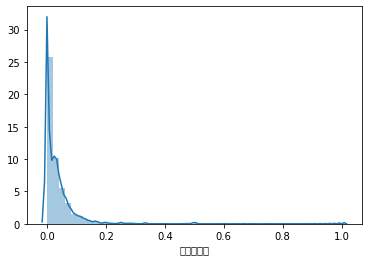

In [77]:
#异常值处理，感兴趣比率绘图
df_category=df_category[df_category['感兴趣比率']<=1]
sns.distplot(df_category['感兴趣比率'])

In [79]:
##将转化率分三类查看各类占比例
df_convert_rate=pd.cut(df_category['转化率'],[-1,0,0.1,1]).value_counts()
df_convert_rate=df_convert_rate/df_convert_rate.sum()
df_convert_rate

#转化率达到0.1以上仅仅只有3.6%的用户，有超过70%的用户几乎不会发生购买行为

(0.0, 0.1]     0.502693
(-1.0, 0.0]    0.476885
(0.1, 1.0]     0.020422
Name: 转化率, dtype: float64

In [81]:
##将感兴趣比率分三类查看各类占比例
df_interest_rate=pd.cut(df_category['感兴趣比率'],[-1,0,0.1,1]).value_counts()
df_interest_rate=df_interest_rate/df_interest_rate.sum()
df_interest_rate

#同时从感兴趣比率来看：有40%的用户对商品不感兴趣

(0.0, 0.1]     0.538487
(-1.0, 0.0]    0.390373
(0.1, 1.0]     0.071140
Name: 感兴趣比率, dtype: float64